In [24]:
!pip install japanize-matplotlib

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib
import statsmodels.api as sm
import seaborn as sns

In [26]:
df = pd.read_csv(r"C:\Users\sk062\Downloads\HR_Employee_Attrition (1).csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df_filtered = df[['Attrition', 'Age', 'MonthlyIncome']]
df_filtered.head()

,Attrition,Age,MonthlyIncome
0,Yes,41,5993
1,No,49,5130
2,Yes,37,2090
3,No,33,2909
4,No,27,3468


In [28]:
df_filtered["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [29]:
#2.B
#HR_Employee_Attritionのデータを使って、Attrition別の年齢と給与の層別回帰分析を行え。

In [30]:
results = {}
for attrition_status, group in df_filtered.groupby('Attrition'):
    X = sm.add_constant(group['Age'])
    y = group['MonthlyIncome']
    model = sm.OLS(y, X).fit()
    results[attrition_status] = model

In [31]:
# 回帰係数とR²の取得
coef_summary = {
    status: {
        'const': model.params['const'],
        'Age': model.params['Age'],
        'R-squared': model.rsquared
    }
    for status, model in results.items()
}

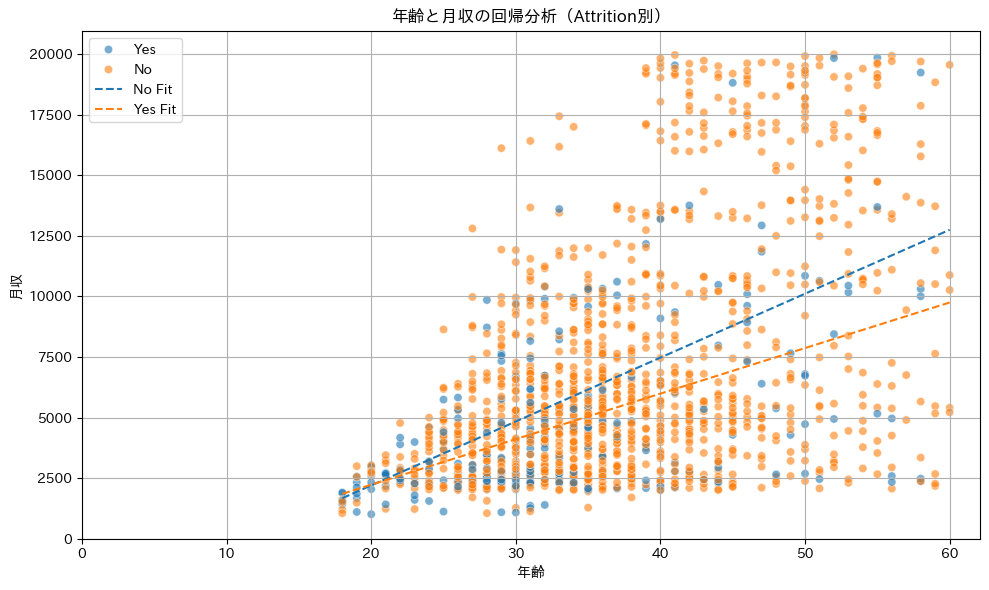

In [32]:
# 可視化（散布図 + 回帰直線 + 原点表示）
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Age', y='MonthlyIncome', hue='Attrition', alpha=0.6)

# 回帰直線を描画
age_range = pd.Series(range(df_filtered['Age'].min(), df_filtered['Age'].max() + 1))
for status, model in results.items():
    y_pred = model.params['const'] + model.params['Age'] * age_range
    plt.plot(age_range, y_pred, label=f"{status} Fit", linestyle='--')

# タイトルや軸
plt.title("年齢と月収の回帰分析（Attrition別）")
plt.xlabel("年齢")
plt.ylabel("月収")

# 原点 (0, 0) を表示に含める
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
coef_summary

{'No': {'const': -3077.3228763651273,
  'Age': 263.8375209241078,
  'R-squared': 0.23688922180382865},
 'Yes': {'const': -1533.5626168804483,
  'Age': 188.07223354685078,
  'R-squared': 0.25060266116447083}}